## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\Cyborg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.2972 - acc: 0.6779 - val_loss: 0.8205 - val_acc: 0.8270
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.7212 - acc: 0.8374 - val_loss: 0.6122 - val_acc: 0.8611
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5900 - acc: 0.8583 - val_loss: 0.5289 - val_acc: 0.8739
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5274 - acc: 0.8687 - val_loss: 0.4822 - val_acc: 0.8798
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4894 - acc: 0.8755 - val_loss: 0.4521 - val_acc: 0.8845
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4633 - acc: 0.8801 - val_loss: 0.4302 - val_acc: 0.8873
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4440 - acc: 0.8835 - val_loss: 0.4141 - val_acc

Test score: 0.3364593309760094
Test accuracy: 0.9087


<IPython.core.display.Javascript object>


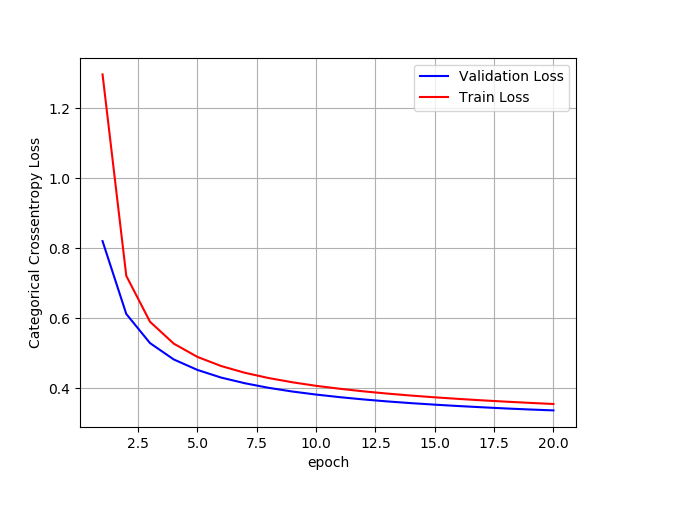

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 2.2669 - acc: 0.2307 - val_loss: 2.2224 - val_acc: 0.2539
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.1803 - acc: 0.4435 - val_loss: 2.1269 - val_acc: 0.5520
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.0674 - acc: 0.5627 - val_loss: 1.9886 - val_acc: 0.5949
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 1.9048 - acc: 0.6162 - val_loss: 1.7951 - val_acc: 0.6601
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 1.6914 - acc: 0.6601 - val_loss: 1.5609 - val_acc: 0.6879
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.4570 - acc: 0.7038 - val_loss: 1.3303 - val_acc: 0.7304
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.2443 - acc: 0.7399 - val_loss: 1.1365 - 

Test score: 0.4597858100652695
Test accuracy: 0.8765


<IPython.core.display.Javascript object>


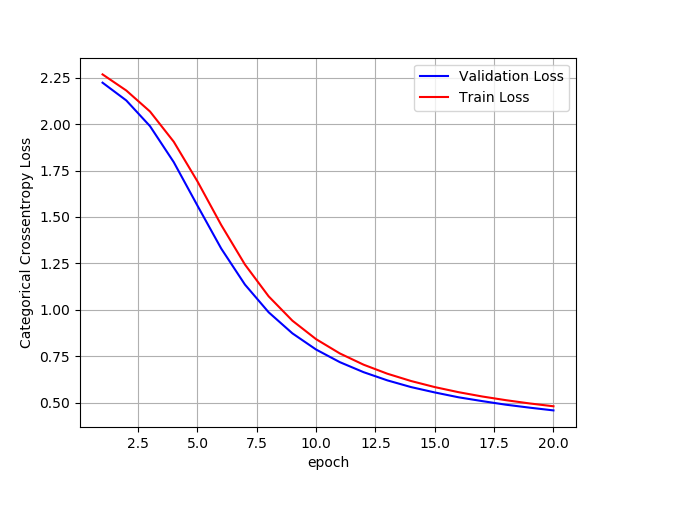

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.5353 - acc: 0.8585 - val_loss: 0.2510 - val_acc: 0.9252
Epoch 2/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2201 - acc: 0.9358 - val_loss: 0.1880 - val_acc: 0.9416
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step

Test score: 0.08389692385394447
Test accuracy: 0.9794


<IPython.core.display.Javascript object>


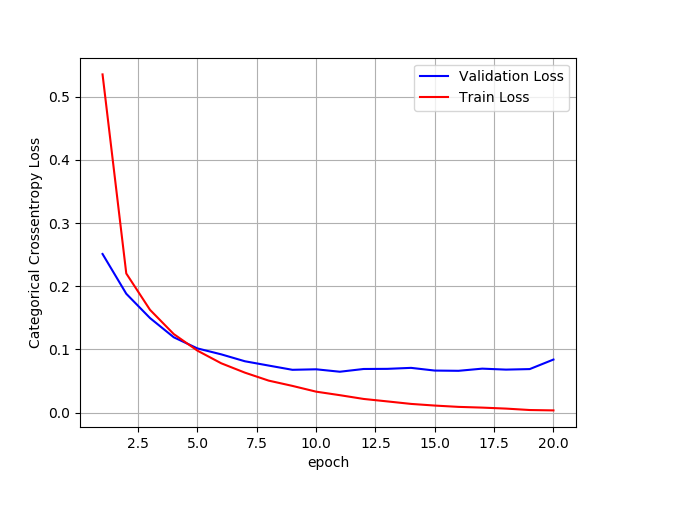

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.7339 - acc: 0.7924 - val_loss: 0.3882 - val_acc: 0.8915
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3494 - acc: 0.9011 - val_loss: 0.2993 - val_acc: 0.9148
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2867 - acc: 0.9187 - val_loss: 0.2583 - val_acc: 0.9246
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2525 - acc: 0.9280 - val_loss: 0.2366 - val_acc: 0.9304
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2290 - acc: 0.9352 - val_loss: 0.2182 - val_acc: 0.9363
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2108 - acc: 0.9397 - val_loss: 0.2047 - val_acc: 0.9392
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1961 - acc: 0.9442 - val_loss: 0.1959 - 

Test score: 0.12284361621588469
Test accuracy: 0.9634


<IPython.core.display.Javascript object>


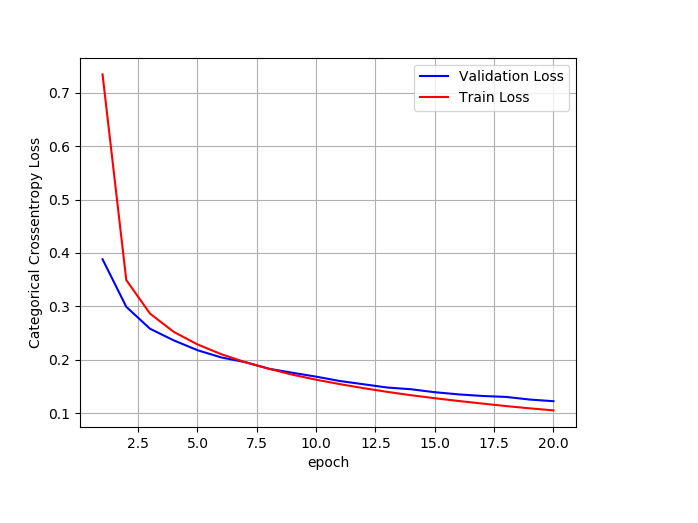

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2256 - acc: 0.9320 - val_loss: 0.1186 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0849 - acc: 0.9740 - val_loss: 0.0879 - val_acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 7s 115us/st

Test score: 0.07846080216073988
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


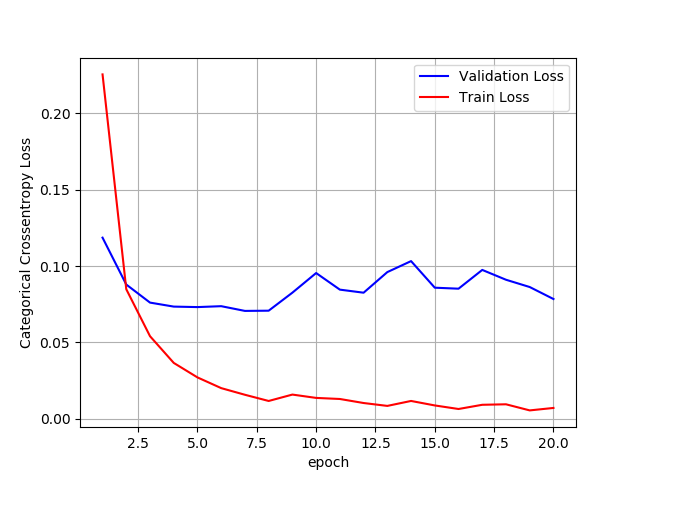

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.3071 - acc: 0.9081 - val_loss: 0.2210 - val_acc: 0.9354
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1786 - acc: 0.9470 - val_loss: 0.1841 - val_acc: 0.9443
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1408 - acc: 0.9585 - val_loss: 0.1496 - val_acc: 0.9543
Epoch 4/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1162 - acc: 0.9649 - val_loss: 0.1310 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0981 - acc: 0.9703 - val_loss: 0.1367 - val_acc: 0.9600
Epoch 6/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0820 - acc: 0.9747 - val_loss: 0.1153 - val_acc: 0.9659
Epoch 7/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0696 - acc: 0.9783 - val_loss: 0.1098 - 

Test score: 0.10802647492955439
Test accuracy: 0.9719


<IPython.core.display.Javascript object>


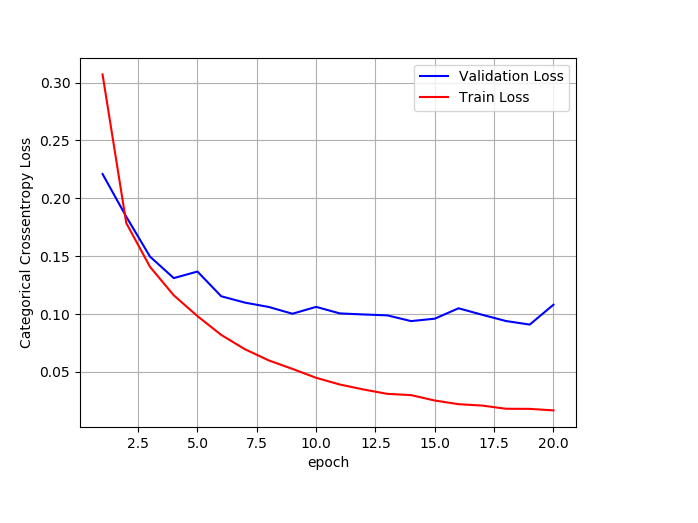

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.6824 - acc: 0.7893 - val_loss: 0.2850 - val_acc: 0.9134
Epoch 2/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.4254 - acc: 0.8716 - val_loss: 0.2517 - val_acc: 0.9234
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.3821 - acc: 0.8843 - val_loss: 0.2361 - val_acc: 0.9300
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.3552 - acc: 0.8929 - val_loss: 0.2250 - val_acc: 0.9324
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.3380 - acc: 0.8984 - val_loss: 0.2122 - val_acc: 0.9385
Epoch 6/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.3196 - acc: 0.9026 - val_loss: 0.1977 - val_acc: 0.9427
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.3096 - acc: 0.9071 - val_loss: 0.1948 -

Test score: 0.10920939962062985
Test accuracy: 0.968


<IPython.core.display.Javascript object>


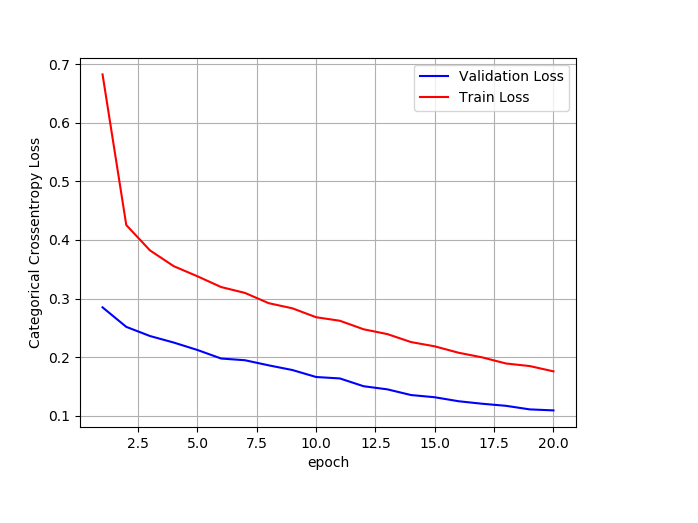

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [38]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975117 using {'activ': 'sigmoid'}
0.975117 (0.000880) with: {'activ': 'sigmoid'}
0.975033 (0.000330) with: {'activ': 'relu'}


# # architectures for assignment- 1> 2 HR-  2> 3HR 3> 5 HR 
# epoch vs training and test loss for each model

### without dropout and BN

In [41]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_42 (Dense)             (None, 120)               43800     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2472 - acc: 0.9270 - val_loss: 0.1224 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0931 - acc: 0.9722 - val_loss: 0.1055 - val_acc: 0.9680
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step

In [42]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1706 - acc: 0.9487 - val_loss: 0.1082 - val_acc: 0.9677
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1639 - acc: 0.9509 - val_loss: 0.1031 - val_acc: 0.9694
Epoch 3/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1584 - acc: 0.9526 - val_loss: 0.0998 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1552 - acc: 0.9531 - val_loss: 0.0947 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1463 - acc: 0.9561 - val_loss: 0.0945 - val_acc: 0.9722
Epoch 6/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1437 - acc: 0.9571 - val_loss: 0.0935 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1397 - acc: 0.9574 - val_loss: 0.0928 -

Test score: 0.07447958973948844
Test accuracy: 0.9793


<IPython.core.display.Javascript object>


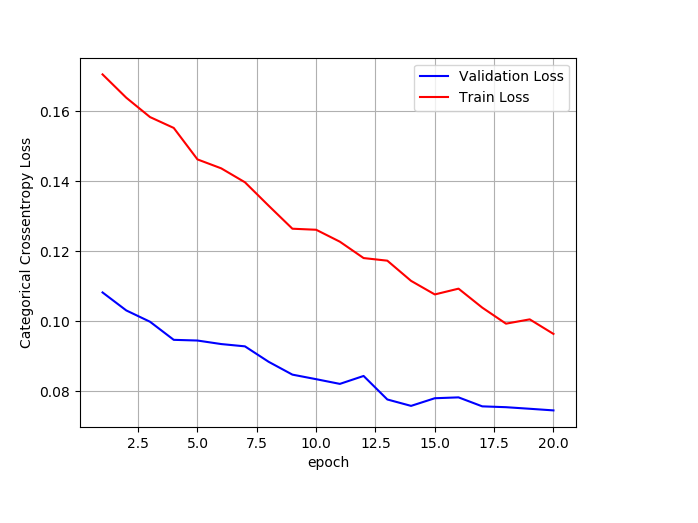

In [43]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [44]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

## with BN

In [45]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_5 (Batch (None, 364)               1456      
_________________________________________________________________
dense_45 (Dense)             (None, 120)               43800     
_________________________________________________________________
batch_normalization_6 (Batch (None, 120)               480       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1210      
Total params: 332,686
Trainable params: 331,718
Non-trainable params: 968
_________________________________________________________________


In [46]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3030 - acc: 0.9113 - val_loss: 0.1984 - val_acc: 0.9415
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1660 - acc: 0.9512 - val_loss: 0.1650 - val_acc: 0.9508
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1286 - acc: 0.9615 - val_loss: 0.1428 - val_acc: 0.9583
Epoch 4/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1016 - acc: 0.9699 - val_loss: 0.1262 - val_acc: 0.9610
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0828 - acc: 0.9747 - val_loss: 0.1305 - val_acc: 0.9614
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0691 - acc: 0.9787 - val_loss: 0.1103 - val_acc: 0.9642
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0593 - acc: 0.9814 - val_loss: 0.1118 - 

Test score: 0.09942051458927018
Test accuracy: 0.9731


<IPython.core.display.Javascript object>


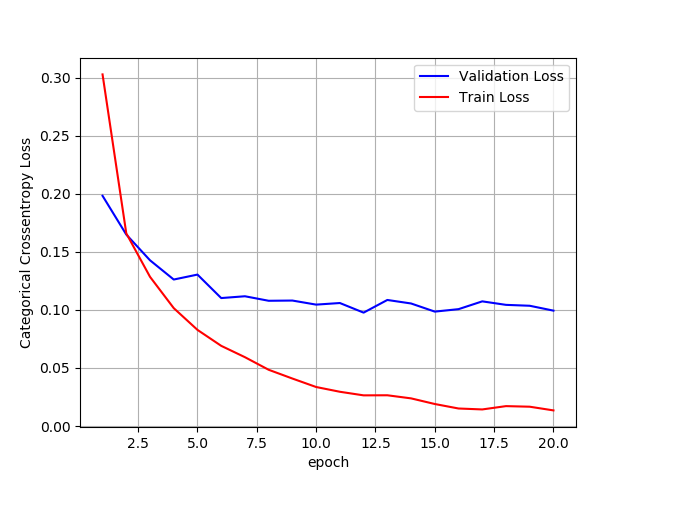

In [47]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [48]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

#### with dropout

In [49]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 120)               43800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.4711 - acc: 0.8559 - val_loss: 0.1513 - val_acc: 0.9529
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2178 - acc: 0.9365 - val_loss: 0.1190 - val_acc: 0.9610
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1694 - acc: 0.9522 - val_loss: 0.0981 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1430 - acc: 0.9580 - val_loss: 0.0832 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1310 - acc: 0.9623 - val_loss: 0.0757 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0749 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1036 - acc: 0.9679 - val_loss: 0.0702 - 

Test score: 0.06740138457393041
Test accuracy: 0.9812


<IPython.core.display.Javascript object>


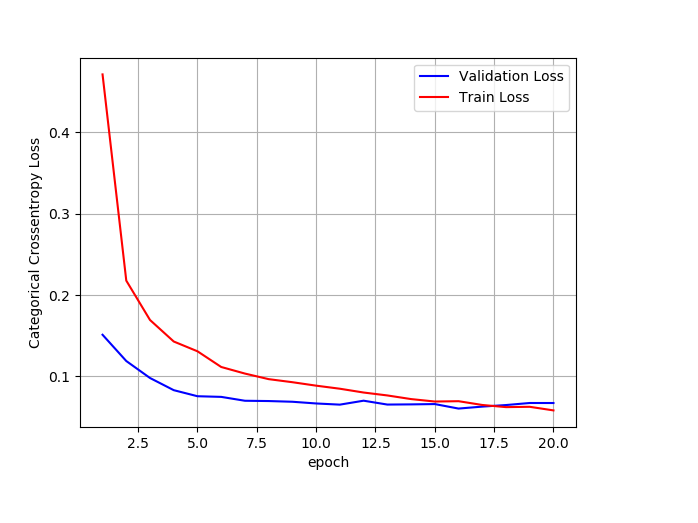

In [51]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [52]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

### with 3 hidden layers

#### without BN and dropout

In [53]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dense(256, activation='relu' ))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_51 (Dense)             (None, 364)               186732    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               93440     
_________________________________________________________________
dense_53 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1210      
Total params: 714,142
Trainable params: 714,142
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2261 - acc: 0.9318 - val_loss: 0.1193 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0868 - acc: 0.9731 - val_loss: 0.1119 - val_acc: 0.9642
Epoch 3/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0577 - acc: 0.9822 - val_loss: 0.0898 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0350 - acc: 0.9888 - val_loss: 0.0725 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0279 - acc: 0.9914 - val_loss: 0.0692 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0292 - acc: 0.9907 - val_loss: 0.

Test score: 0.08711073778198697
Test accuracy: 0.9797


<IPython.core.display.Javascript object>


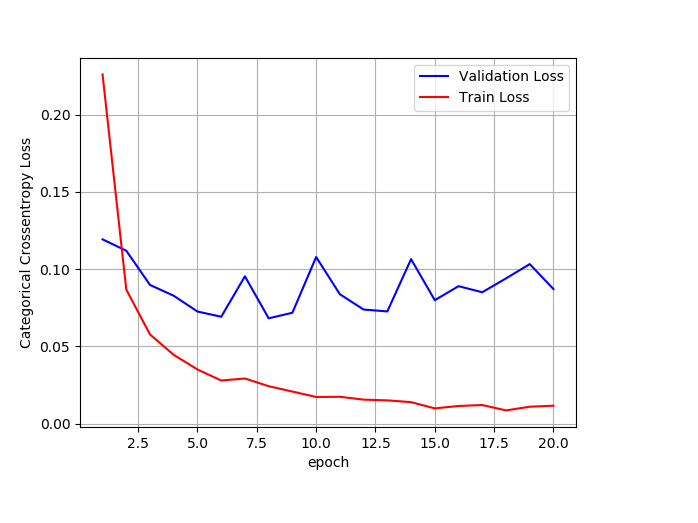

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

### with BN

In [57]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(256, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(120, activation='relu') )
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_56 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_8 (Batch (None, 364)               1456      
_________________________________________________________________
dense_57 (Dense)             (None, 256)               93440     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_58 (Dense)             (None, 120)               30840     
__________

In [58]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.1785 - acc: 0.9454 - val_loss: 0.0999 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0783 - acc: 0.9754 - val_loss: 0.0925 - val_acc: 0.9721
Epoch 3/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0582 - acc: 0.9811 - val_loss: 0.0985 - val_acc: 0.9714
Epoch 4/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0427 - acc: 0.9863 - val_loss: 0.0785 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.0764 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0314 - acc: 0.9895 - val_loss: 0.0827 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0285 - acc: 0.9909 - val_loss: 0.

Test score: 0.09226390148166319
Test accuracy: 0.9781


C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


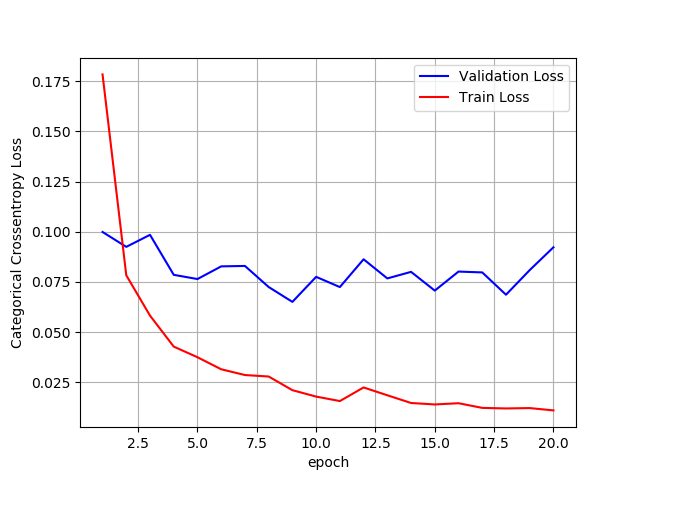

In [59]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [60]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

### with Dropout

In [61]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu' ))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 364)               186732    
_________________________________________________________________
dropout_6 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               93440     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 120)               30840     
__________

In [62]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.6834 - acc: 0.7807 - val_loss: 0.1712 - val_acc: 0.9501
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.2597 - acc: 0.9318 - val_loss: 0.1268 - val_acc: 0.9652
Epoch 3/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.2036 - acc: 0.9458 - val_loss: 0.1152 - val_acc: 0.9671
Epoch 4/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.1787 - acc: 0.9539 - val_loss: 0.0976 - val_acc: 0.9723
Epoch 5/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1564 - acc: 0.9601 - val_loss: 0.0969 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1432 - acc: 0.9619 - val_loss: 0.0872 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1301 - acc: 0.9661 - val_loss: 0.

Test score: 0.07415152454414983
Test accuracy: 0.9838


C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


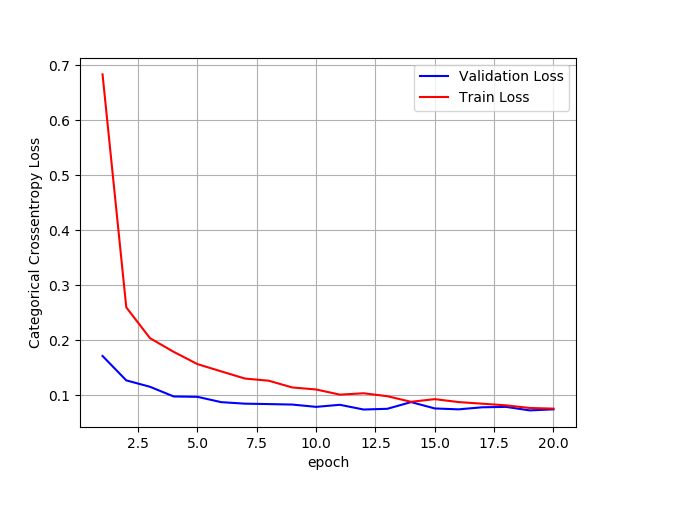

In [63]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [64]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

#### with 5 hidden layer

In [65]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(428, activation='relu' ))
model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dense(256, activation='relu') )
model_drop.add(Dense(128, activation='relu') )
model_drop.add(Dense(52, activation='relu') )
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_66 (Dense)             (None, 428)               219564    
_________________________________________________________________
dense_67 (Dense)             (None, 364)               156156    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               93440     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_70 (Dense)             (None, 52)                6708      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                530       
Total para

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.2590 - acc: 0.9212 - val_loss: 0.1052 - val_acc: 0.9687
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0978 - acc: 0.9711 - val_loss: 0.1017 - val_acc: 0.9696
Epoch 3/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0699 - acc: 0.9790 - val_loss: 0.0870 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0875 - val_acc: 0.9761
Epoch 5/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0451 - acc: 0.9861 - val_loss: 0.0784 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0363 - acc: 0.9890 - val_loss: 0.0823 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0339 - acc: 0.9898 - val_loss: 0.

Test score: 0.11641976288868464
Test accuracy: 0.9789


C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


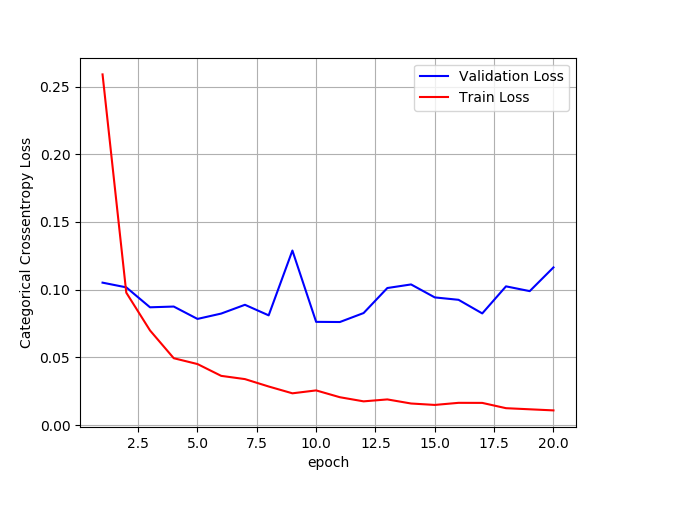

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [68]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

### with BN

In [69]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(428, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(364, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(256, activation='relu') )
model_drop.add(BatchNormalization())
model_drop.add(Dense(128, activation='relu') )
model_drop.add(BatchNormalization())
model_drop.add(Dense(52, activation='relu') )
model_drop.add(BatchNormalization())
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_73 (Dense)             (None, 428)               219564    
_________________________________________________________________
batch_normalization_12 (Batc (None, 428)               1712      
_________________________________________________________________
dense_74 (Dense)             (None, 364)               156156    
_________________________________________________________________
batch_normalization_13 (Batc (None, 364)               1456      
_________________________________________________________________
dense_75 (Dense)             (None, 256)               93440     
__________

In [70]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.2100 - acc: 0.9381 - val_loss: 0.0970 - val_acc: 0.9702
Epoch 2/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.0956 - acc: 0.9706 - val_loss: 0.0891 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0704 - acc: 0.9792 - val_loss: 0.0991 - val_acc: 0.9685
Epoch 4/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0589 - acc: 0.9818 - val_loss: 0.1030 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0506 - acc: 0.9833 - val_loss: 0.1015 - val_acc: 0.9699
Epoch 6/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.0762 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0429 - acc: 0.9866 - val_loss: 0.

Test score: 0.08270550742663908
Test accuracy: 0.9819


C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


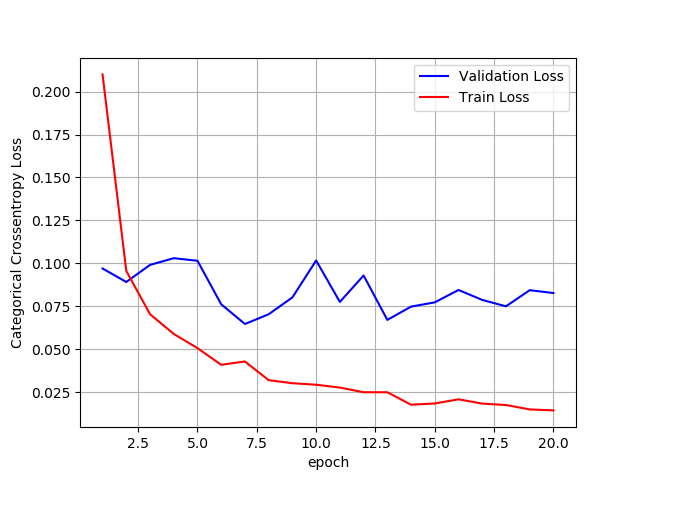

In [71]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [72]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

### With dropout

In [73]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(428, activation='relu' , kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' , kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 428)               219564    
_________________________________________________________________
dropout_10 (Dropout)         (None, 428)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 364)               156156    
_________________________________________________________________
dropout_11 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               93440     
__________

In [74]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 292us/step - loss: 14.5069 - acc: 0.0999 - val_loss: 15.2183 - val_acc: 0.0558
Epoch 2/20
60000/60000 [==============================] - 16s 262us/step - loss: 14.5036 - acc: 0.1001 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 3/20
60000/60000 [==============================] - 16s 263us/step - loss: 14.5325 - acc: 0.0984 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 4/20
60000/60000 [==============================] - 15s 258us/step - loss: 14.5122 - acc: 0.0996 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 5/20
60000/60000 [==============================] - 15s 258us/step - loss: 14.5009 - acc: 0.1003 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 6/20
60000/60000 [==============================] - 16s 261us/step - loss: 14.4950 - acc: 0.1007 - val_loss: 14.0680 - val_acc: 0.1271
Epoch 7/20
60000/60000 [==============================] - 16s 260us/step - loss: 14.5359 - acc: 0.0981 -

Test score: 14.573981651306152
Test accuracy: 0.0958


C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


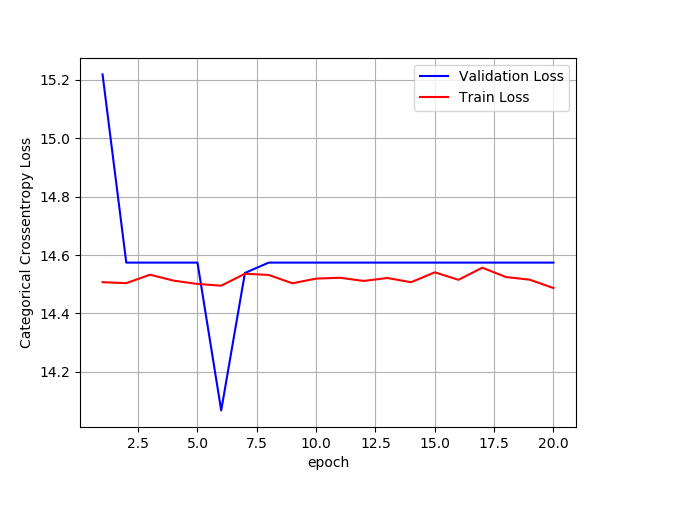

In [75]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [76]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

In [83]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["hidden layers", "Activation", "BN/DropOut", " Accuracy" ]

x.add_row([2 ,"relu", "no ", 98.42] )
x.add_row(["2" ,"sigmoid", "BN", 97.31 ])
x.add_row(["2" ,"relu", "DropOut", 98.12 ])

x.add_row(["3" ,"relu", " ", 97.97 ])
x.add_row(["3" ,"relu", "BN", 97.81 ])
x.add_row(["3" ,"relu", "DropOut", 98.38 ])

x.add_row(["5" ,"relu", " ", 97.89 ])
x.add_row(["5" ,"relu", "BN", 98.19 ])
x.add_row(["5" ,"relu", "DropOut", 9.58 ])

print(x)

+---------------+------------+------------+-----------+
| hidden layers | Activation | BN/DropOut |  Accuracy |
+---------------+------------+------------+-----------+
|       2       |    relu    |    no      |   98.42   |
|       2       |  sigmoid   |     BN     |   97.31   |
|       2       |    relu    |  DropOut   |   98.12   |
|       3       |    relu    |            |   97.97   |
|       3       |    relu    |     BN     |   97.81   |
|       3       |    relu    |  DropOut   |   98.38   |
|       5       |    relu    |            |   97.89   |
|       5       |    relu    |     BN     |   98.19   |
|       5       |    relu    |  DropOut   |    9.58   |
+---------------+------------+------------+-----------+
